In [2]:
import numpy as np 
import matplotlib.pyplot as plt 


In [3]:
def metodoEuler(derivada, paso, objetivo, origen, valorInicial):
    #Asumiendo que origen < objetivo
    valores = [valorInicial]
    puntos = [origen]
    puntoActual = origen
    valorActual = valorInicial
    while(puntoActual < objetivo):
        valorActual = valorActual + paso * derivada(puntoActual,valorActual)
        puntoActual = puntoActual + paso
        puntos.append(puntoActual)
        valores.append(valorActual)
    return puntos, valores

    
    


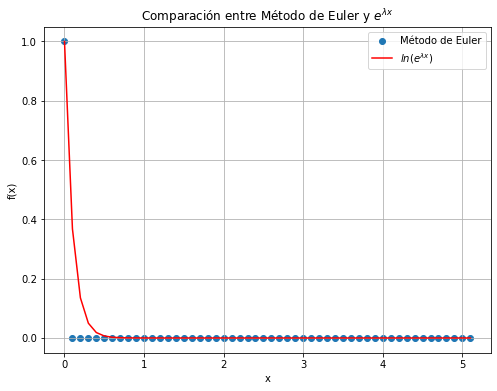

In [21]:
lda = -10

puntos, valores = metodoEuler(lambda t, f: lda*f, 0.1, 5, 0, 1)

x_values = np.array(puntos)
e_values = np.exp(lda * x_values)

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.scatter(puntos, (valores), label='Método de Euler')
plt.plot(x_values, (e_values), label=r'$ln(e^{\lambda x})$', color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Comparación entre Método de Euler y $e^{\lambda x}$')
plt.legend()
plt.grid(True)
plt.show()


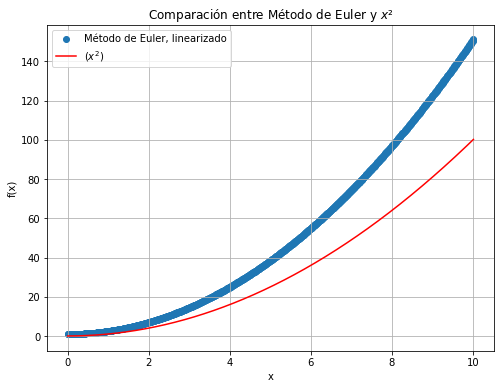

In [22]:
lda = 1

puntos, valores = metodoEuler(lambda t, f: 3*t, 0.01, 10, 0, 1)

x_values = np.array(puntos)
e_values = (lda * x_values)**2

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.scatter(puntos, valores, label='Método de Euler, linearizado')
plt.plot(x_values, e_values, label=r'$(x^{2})$', color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Comparación entre Método de Euler y $x²$')
plt.legend()
plt.grid(True)
plt.show()


In [97]:
def metodoEulerSistemas(primeraDerivada,segundaDerivada, paso, objetivo, origen, primeraVariableInicial,segundaVariableInicial):
    #Asumiendo que origen < objetivo
    valoresPrimeraVariable = [primeraVariableInicial]
    valoresSegundaVariable = [segundaVariableInicial]
    puntos = [origen]
    puntoActual = origen
    valorActualPrimeraVariable = primeraVariableInicial
    valorActualSegundaVariable = segundaVariableInicial
    
    while(puntoActual < objetivo):
        memoPrimeraVariable = valorActualPrimeraVariable
        valorActualPrimeraVariable = valorActualPrimeraVariable + paso * primeraDerivada(puntoActual,valorActualPrimeraVariable, valorActualSegundaVariable)
        valorActualSegundaVariable = valorActualSegundaVariable + paso * segundaDerivada(puntoActual,valorActualSegundaVariable, memoPrimeraVariable)
        puntoActual = puntoActual + paso
        puntos.append(puntoActual)
        valoresPrimeraVariable.append(valorActualPrimeraVariable)
        valoresSegundaVariable.append(valorActualSegundaVariable)
    return puntos, valoresPrimeraVariable, valoresSegundaVariable
#derivadas dependen de todas las variables
#primeraDerivada = lambda t, y, otraVariable
#segundaDerivada = lambda t, y, otraVariable

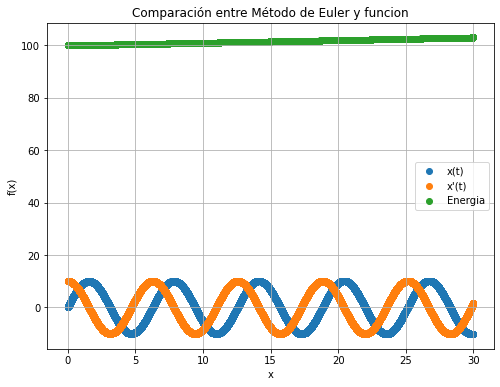

In [111]:
puntos, valoresPrimeraVariable, valoresSegundaVariable = metodoEulerSistemas(lambda t, f, otraVariable: otraVariable,lambda t, f, otraVariable: -otraVariable, 0.001, 30, 0, 0, 10)

x_values = np.array(puntos)
e_values = np.sin(lda * x_values)

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.scatter(puntos, (valoresPrimeraVariable), label='x(t)')
plt.scatter(puntos, (valoresSegundaVariable), label='x\'(t)')
energia = (np.array(valoresPrimeraVariable)**2) + (np.array(valoresSegundaVariable) ** 2)
plt.scatter(puntos,energia,label='Energia')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Comparación entre Método de Euler y funcion')
plt.legend()
plt.grid(True)
plt.show()


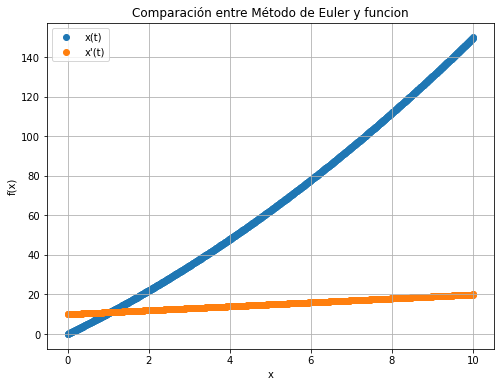

In [99]:
puntos, valoresPrimeraVariable, valoresSegundaVariable = metodoEulerSistemas(lambda t, f, otraVariable: otraVariable,lambda t, f, otraVariable: np.e**(-(1/(f**2))), 0.01, 10, 0, 0, 10)

x_values = np.array(puntos)
e_values = np.sin(lda * x_values)

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.scatter(puntos, (valoresPrimeraVariable), label='x(t)')
plt.scatter(puntos, (valoresSegundaVariable), label='x\'(t)')
#plt.plot(x_values, (e_values), label=r'$ln(e^{\lambda x})$', color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Comparación entre Método de Euler y funcion')
plt.legend()
plt.grid(True)
plt.show()

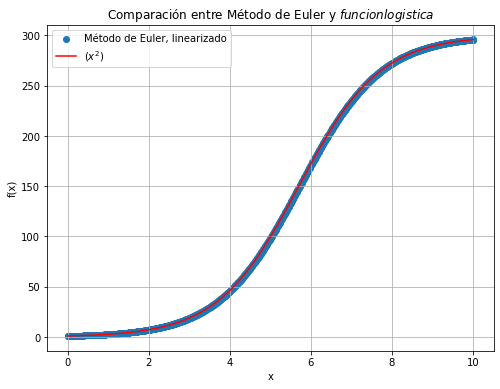

In [130]:
r = 1
k = 300

puntos, valores = metodoEuler(lambda t, f: r*f*(1-f/k), 0.01, 10, 0, 1)

x_values = np.array(puntos)
e_values = k/(1 + np.e ** (-r*(x_values - 5.7)))

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.scatter(puntos, valores, label='Método de Euler, linearizado')
plt.plot(x_values, e_values, label=r'$(x^{2})$', color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Comparación entre Método de Euler y $funcion logistica$')
plt.legend()
plt.grid(True)
plt.show()
